# Figure, Axes and Subplots

- A `Figure` represents the overall container for one or more `Axes` and other graph components. Its coordinates range from 0 to 1 on both x and y axes.
- An `Axes` is a container for displaying a single chart, with coordinates in the same scale as the data.

Elements such as `text` can be added to both, `Figure` and `Axes`!

In [1]:
import matplotlib.pyplot as plt

In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

Adding a `Text` element at the `Axes` level:

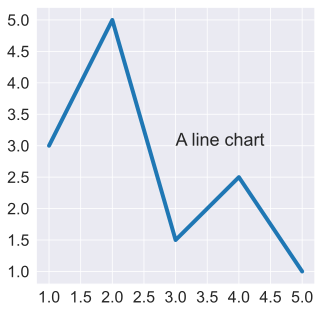

In [3]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot([1,2,3,4,5], [3,5,1.5,2.5,1], linewidth=4)
ax.text(3, 3, "A line chart", fontsize=18)

for label in ax.get_xticklabels() + ax.get_yticklabels():
   label.set_fontsize(16)

plt.show()

Adding a `Text` element at the `Figure` level:

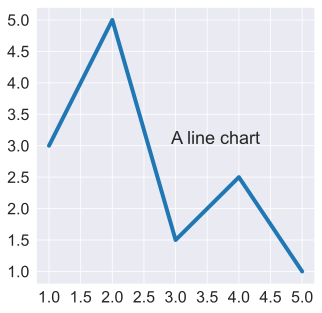

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot([1,2,3,4,5], [3,5,1.5,2.5,1], linewidth=4)
fig.text(0.5, 0.5, "A line chart", fontsize=18)

for label in ax.get_xticklabels() + ax.get_yticklabels():
   label.set_fontsize(16)

plt.show()

Working with Multiple Axes:

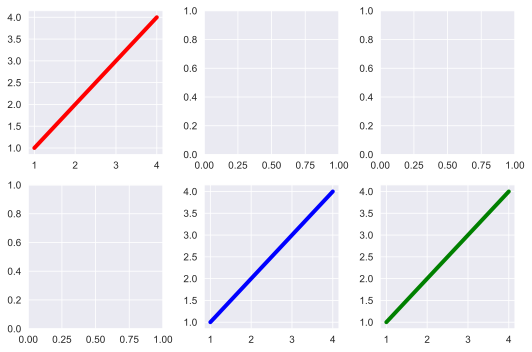

In [5]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, axs = plt.subplots(
   ncols=3,
   nrows=2,
   figsize=(7.5, 5),
   layout="tight"
)

axs[0, 0].plot(x, y, color="red", linewidth=4)
axs[1, 1].plot(x, y, color="blue", linewidth=4)
axs[1, 2].plot(x, y, color="green", linewidth=4)

plt.show()

Combination of different Chart Types:

In [6]:
import os
import pandas as pd
import seaborn as sns

from dotenv import load_dotenv

load_dotenv()
data_folder = os.getenv('DATA_FOLDER')

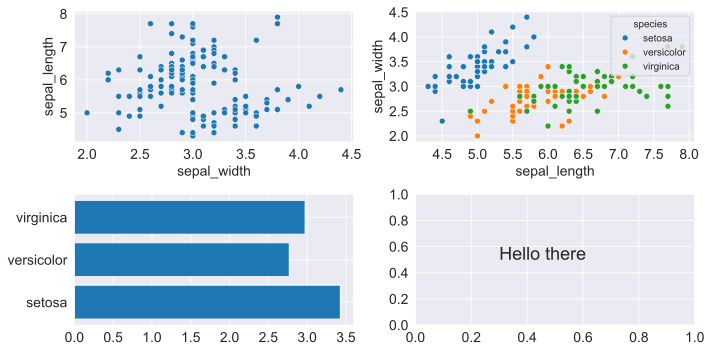

In [7]:
iris = pd.read_csv(os.path.join(data_folder, 'pandas_exs', 'iris.csv'))

fig, axs = plt.subplots(
   ncols=2,
   nrows=2,
   figsize=(10, 5),
   layout="tight"
)

x = iris["sepal_width"]
y = iris["sepal_length"]
c = iris["species"]

agg = iris.groupby("species", as_index=False)[
   "sepal_width"
].mean()

sns.scatterplot(x=x, y=y, ax=axs[0, 0])
sns.scatterplot(x=y, y=x, hue=c, ax=axs[0, 1])
axs[1, 0].barh(agg["species"], agg["sepal_width"])
axs[1, 1].text(
   x=0.3, y=0.5, s="Hello there", size=18
)

# Set font size for all labels and text elements
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.set_title(ax.get_title(), fontsize=14)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)

plt.show()